In [1]:
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
spamreader = pd.read_csv("fitting.txt", sep=" ")
x_obs=np.array(spamreader["#"])
y_obs=np.array(spamreader["x"])
sigma_y_obs = np.array(spamreader["y"])

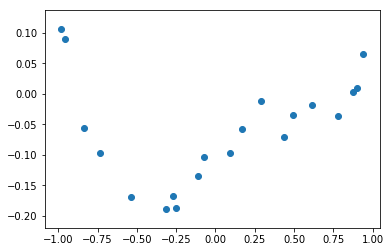

In [3]:
plt.scatter(x_obs,y_obs)

In [7]:
def prior(p):
    param = np.random.random(size=p)*2-1
    return param

def modelo(x,param):
    p = len(param)
    y=x.copy()
    y[:]=0
    for i in range(p):
        y+=param[i]*(x**i)
    return y

def loglikelihood(x_obs, y_obs, sigma_y_obs, param):
    #Usando Gauss
    d = y_obs -  modelo(x_obs, param)
    d = -0.5*d**2/sigma_y_obs**2
    d = d-np.log(np.sqrt(2*np.pi*sigma_y_obs))
    d = np.sum(d)
    return d

In [12]:
def integral(x_obs, y_obs, sigma_y_obs, N=10000, p=3):
    likes = []
    for i in range(N):
        betas = prior(p)
        b = loglikelihood(x_obs, y_obs, sigma_y_obs, betas)
        likes.append(np.exp(b))
    prom = np.mean(likes)
    
    return prom
    

In [15]:
integral(x_obs, y_obs, sigma_y_obs)

4.297480943231863e-25